# Assignment 1: Data Parsing, Cleansing and Integration
## Task 1 and 2

#### Student Name: VIVEK AGGARWAL
#### Student ID: S4015465

Date: 04/09/2023

Version: 1.0

Environment: Python 3 and Jupyter notebook


## Introduction
To get started, the code imports the required libraries, including Pandas, NumPy, ElementTree (for parsing XML), and the regular expression library (re). Following that, it uses ElementTree to parse an XML file with the name "s4015465_dataset1.xml," extract data from it, then clean and preprocess the data that was extracted.


## Brief Description of the Approach

XML Parsing: The code first parses the XML file and uses ElementTree to extract the data and put it in an organized fashion. It examines particular components within the XML file and investigates its internal structure.

Data Extraction: It takes data from the XML elements, concentrating on information about work opportunities. Job title, location, firm, contract type, contract duration, category, salary, open and close dates, and source name are just a few of the fields in the extracted data.

Data Cleaning: After extracting the data, the code performs several cleaning operations on it. These cleaning duties consist of:
deleting any unnecessary spaces and symbols from text fields (such as names of places and businesses) that have them.
handling incorrect or missing data by substituting suitable values (for example, "non specified" for missing contract types and times). Transforming numerical columns like "Salary" into the proper data type.
"OpenDate" and "CloseDate" date columns have been cleaned and formatted.
replacing variants with uniform names to standardize place names.

Data Visualization: The code generates a box plot to show how the incomes in the dataset are distributed.

Data transformations: They are carried out, such as the conversion of "PositionID" to an integer type.

Data Output: Finally, the cleaned and preprocessed data is saved to a CSV file named "s4015465_dataset1_solution.csv."


## Importing libraries 

In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import xml.etree.ElementTree as etree 
import re

## Task 1. Parsing Data

### 1.1. Examining and loading data
 

In [2]:
#we demonstrate the process using ElementTree.
tree = etree.parse("./s4015465_dataset1.xml")

In [3]:
#Now let's have a look at the `root` element.
root = tree.getroot()     
root.tag

'Records'

In [4]:
len(root)

107

In [5]:
# retrieving the list element by indexing
root[0]

<Element 'Src' at 0x0000021076A48EA0>

In [6]:
#let's have a look at the children of the `root` element.
for child in root:
    print(child)

<Element 'Src' at 0x0000021076A48EA0>
<Element 'Src' at 0x0000021078EA65C0>
<Element 'Src' at 0x00000210793AA0C0>
<Element 'Src' at 0x000002107A4326B0>
<Element 'Src' at 0x000002107A62D170>
<Element 'Src' at 0x000002107A971440>
<Element 'Src' at 0x000002107AF5F4C0>
<Element 'Src' at 0x000002107AFE8040>
<Element 'Src' at 0x000002107B0B9490>
<Element 'Src' at 0x000002107BD77060>
<Element 'Src' at 0x000002107BE548B0>
<Element 'Src' at 0x000002107BF0F060>
<Element 'Src' at 0x000002107C05AD90>
<Element 'Src' at 0x000002107C3C0C20>
<Element 'Src' at 0x000002107C4C6E80>
<Element 'Src' at 0x000002107C5676A0>
<Element 'Src' at 0x000002107C86CAE0>
<Element 'Src' at 0x000002107CA49FD0>
<Element 'Src' at 0x000002107CA9EA70>
<Element 'Src' at 0x000002107CB0D1C0>
<Element 'Src' at 0x000002107CD0ADE0>
<Element 'Src' at 0x000002107CD3FAB0>
<Element 'Src' at 0x000002107CE07DD0>
<Element 'Src' at 0x000002107CE75CB0>
<Element 'Src' at 0x000002107CEA3C40>
<Element 'Src' at 0x000002107CF4E570>
<Element 'Sr

In [7]:
# we want to see how many children `root[0]` has
len(root[0]) 


96

In [8]:
for g_child in root[0]:
    print(g_child)

<Element 'SrcName' at 0x0000021076A4BEC0>
<Element 'Position' at 0x0000021076A48F90>
<Element 'Position' at 0x0000021076A4B0B0>
<Element 'Position' at 0x0000021076A4B240>
<Element 'Position' at 0x0000021076A4B4C0>
<Element 'Position' at 0x0000021078E61F80>
<Element 'Position' at 0x0000021078E62340>
<Element 'Position' at 0x0000021078E626B0>
<Element 'Position' at 0x0000021078E62A70>
<Element 'Position' at 0x0000021078E62DE0>
<Element 'Position' at 0x0000021078E63100>
<Element 'Position' at 0x0000021078E63470>
<Element 'Position' at 0x0000021078E63830>
<Element 'Position' at 0x0000021078E63BA0>
<Element 'Position' at 0x0000021078E63F10>
<Element 'Position' at 0x0000021078E74310>
<Element 'Position' at 0x0000021078E74720>
<Element 'Position' at 0x0000021078E74B80>
<Element 'Position' at 0x0000021078E74F90>
<Element 'Position' at 0x0000021078E75300>
<Element 'Position' at 0x0000021078E756C0>
<Element 'Position' at 0x0000021078E75A80>
<Element 'Position' at 0x0000021078E75DF0>
<Element 'Po

In [9]:
root[0][0]

<Element 'SrcName' at 0x0000021076A4BEC0>

In [10]:
root[0][1]

<Element 'Position' at 0x0000021076A48F90>

In [11]:
#we see that the position elements start from index 1 of root[0]
#so we print the info that every grandchild has but of second child
for g_g_child in root[0][1]:
    print(g_g_child)
    
#root[0][1] should correspond to the first record

<Element 'Title' at 0x0000021076A49DF0>
<Element 'Location' at 0x0000021076A4AD40>
<Element 'Company' at 0x0000021076A49C10>
<Element 'ContractType' at 0x0000021076A49E40>
<Element 'ContractTime' at 0x0000021076A49E90>
<Element 'Category' at 0x0000021076A4AFC0>
<Element 'Salary' at 0x0000021076A49EE0>
<Element 'OpenDate' at 0x0000021076A49F30>
<Element 'CloseDate' at 0x0000021076A4B060>


### 1.2 Parsing data into the required format

In [12]:
data = list()
for src in root.findall('.//Src'):

    src_name = src.find('SrcName').text

   

    for position in src.findall('Position'):

        position_data = {

            'SrcName': src_name,

            'PositionID': position.get('ID'),

            'Title': position.find('Title').text,

            'Location': position.find('Location').text if position.find('Location') is not None else '',

            'Company': position.find('Company').text if position.find('Company') is not None else '',

            'ContractType': position.find('ContractType').text if position.find('ContractType') is not None else '',

            'ContractTime': position.find('ContractTime').text if position.find('ContractTime') is not None else '',

            'Category': position.find('Category').text if position.find('Category') is not None else '',

            'Salary': position.find('Salary').text if position.find('Salary') is not None else '',

            'OpenDate': position.find('OpenDate').text if position.find('OpenDate') is not None else '',

            'CloseDate': position.find('CloseDate').text if position.find('CloseDate') is not None else '',

        }

        data.append(position_data)

 

# Create a DataFrame

df = pd.DataFrame(data)

In [13]:
df.head()

SrcName PositionID  \
0  energygenerationjobs.com   69568721   
1  energygenerationjobs.com   71351976   
2  energygenerationjobs.com   68303946   
3  energygenerationjobs.com   72654312   
4  energygenerationjobs.com   71799126   

                                               Title    Location  \
0         Manufacturing Engineer  Injection Moulding   Hampshire   
1                   Civil Design Engineer London, UK      London   
2  Project Manager/Team Lead/Technology Change/Fi...      London   
3                    2nd / 3rd Line Support  Windows  Birmingham   
4                     Marketing Executive  ecommerce   Berkshire   

                     Company ContractType ContractTime  \
0          Austin Fraser Ltd    full_time    permanent   
1             Selby Jennings    full_time    permanent   
2         Cornwallis Elt Ltd    full_time    permanent   
3                Harvey Nash    full_time    permanent   
4  ECS Recruitment Group Ltd    full_time    permanent   

                    Category Salary         OpenDate        CloseDate  
0           Engineering Jobs  37500  20130626T000000  20130924T000000  
1           Engineering Jobs  32500  20121224T150000  20130123T150000  
2  Accounting & Finance Jobs  67500  20120310T000000  20120608T000000  
3                    IT Jobs  30000  20131207T000000  20140307T000000  
4                 Sales Jobs  32500  20131207T120000  20140205T120000

In [14]:
df['SrcName'].nunique()


107

## Task 2. Auditing and cleansing the loaded data



In [15]:
# Define the clean_text function
def clean_text(text):
    original_text = text
    cleaned_text = re.sub(r'\s+', ' ', text.strip())
    cleaned_text = re.sub(r'[^\w\s.]+', '', cleaned_text)
    cleaned_text = cleaned_text.replace('*', '')
    cleaned_text = re.sub(r'\b[kK]\b', '', cleaned_text)

    modifications = []

    if cleaned_text != original_text:
        if len(cleaned_text) < len(original_text):
            modifications.append(f'Removed characters: {original_text[len(cleaned_text):]}')
        elif len(cleaned_text) > len(original_text):
            modifications.append(f'Added characters: {cleaned_text[len(original_text):]}')
        else:
            for o, c in zip(original_text, cleaned_text):
                if o != c:
                    modifications.append(f'Replaced "{o}" with "{c}"')

        return original_text, cleaned_text, ' '.join(modifications)
    else:
        return None, cleaned_text, None




# Apply the clean_text function to text fields
cleaned_columns = ['Title', 'Location', 'Company']
for col in cleaned_columns:
    df[col] = df[col].apply(clean_text).str[1]  # Use str[1] to get the cleaned value



In [16]:
# Convert numeric columns to numeric
numericals = ['Salary']
df[numericals] = df[numericals].apply(pd.to_numeric, errors='coerce')

# Calculate rounded mean for each numeric column
rounded_mean = df[numericals].mean().round().astype(int)

# Fill missing values with rounded mean
df_filled = df.fillna(rounded_mean)



In [17]:
# Reorder columns with SourceName at the end
column_order = ['PositionID', 'Title', 'Location', 'Company', 'Salary', 'ContractType', 'ContractTime', 'Category', 'OpenDate', 'CloseDate', 'SrcName']
final_df = df_filled[column_order]



In [18]:
# Replace 'NA' and empty spaces with 'non specified' in ContractType and ContractTime columns
final_df['ContractType'].replace(['NA', ''], 'non specified', inplace=True)
final_df['ContractTime'].replace(['NA', ''], 'non specified', inplace=True)



C:\Users\vivek\AppData\Local\Temp\ipykernel_25432\3956511457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['ContractType'].replace(['NA', ''], 'non specified', inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_25432\3956511457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['ContractTime'].replace(['NA', ''], 'non specified', inplace=True)


In [19]:
# Convert 'OpenDate' and 'CloseDate' columns to datetime format
final_df['OpenDate'] = pd.to_datetime(final_df['OpenDate'], format='%Y%m%dT%H%M%S', errors='coerce')
final_df['CloseDate'] = pd.to_datetime(final_df['CloseDate'], format='%Y%m%dT%H%M%S', errors='coerce')

# Ensure OpenDate is not greater than CloseDate
final_df['OpenDate'], final_df['CloseDate'] = (
    final_df[['OpenDate', 'CloseDate']].min(axis=1),
    final_df[['OpenDate', 'CloseDate']].max(axis=1)
)

# Convert 'OpenDate' and 'CloseDate' columns to the desired format
final_df['OpenDate'] = final_df['OpenDate'].dt.strftime('%Y-%m-%d %H:%M:%S')
final_df['CloseDate'] = final_df['CloseDate'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [20]:
final_df['Location'].unique()

array(['Hampshire', 'London', 'Birmingham', 'Berkshire', 'UK', 'Bradford',
       'Somerset', 'Leicestershire', 'South East London',
       'Yorkshire and Humberside', 'Warwickshire', 'Lancashire', 'Kent',
       'Wiltshire', 'Cheltenham', 'North West London',
       'North East England', 'East Sussex', 'Staffordshire',
       'North West England', 'Cheshire', 'Worcestershire', 'Essex',
       'Merseyside', 'Newcastle Upon Tyne', 'Barnstaple',
       'Gloucestershire', 'Hove', 'Hertfordshire', 'West Midlands',
       'Aberdeen', 'Scotland', 'Dorset', 'Derbyshire', 'Wakefield',
       'Leeds', 'Reading', 'Milton Keynes', 'Devizes', 'Liverpool',
       'Devon', 'Surrey', 'North Lambeth', 'Leamington Spa',
       'Basingstoke', 'Swindon', 'East Sheen', 'Weybridge', 'Hungerford',
       'Chippenham', 'Guildford', 'Towcester', 'South West London',
       'Eastbourne', 'Sheffield', 'Edinburgh Technopole', 'Nottingham',
       'Warrington', 'Bracknell', 'Farnham', 'Oxford', 'Leicester',
     

In [21]:
def clean_location(location):
    patterns = [
        (r'\b[Hh]ampshire\b', 'Hampshire'),
        (r'\b[Ll]ondon\b', 'London'),
        (r'\b[Bb]irmingham\b', 'Birmingham'),
        (r'\b[Ww]est [Mm]idlands\b', 'West Midlands'),
    ]
    
    for pattern, replacement in patterns:
        location = re.sub(pattern, replacement, location)
    
    return location

# Apply the clean_location function to the 'Location' column
final_df['Location'] = final_df['Location'].apply(clean_location)

# Check unique values in the 'Location' column after cleaning
print(final_df['Location'].unique())


['Hampshire' 'London' 'Birmingham' 'Berkshire' 'UK' 'Bradford' 'Somerset'
 'Leicestershire' 'South East London' 'Yorkshire and Humberside'
 'Warwickshire' 'Lancashire' 'Kent' 'Wiltshire' 'Cheltenham'
 'North West London' 'North East England' 'East Sussex' 'Staffordshire'
 'North West England' 'Cheshire' 'Worcestershire' 'Essex' 'Merseyside'
 'Newcastle Upon Tyne' 'Barnstaple' 'Gloucestershire' 'Hove'
 'Hertfordshire' 'West Midlands' 'Aberdeen' 'Scotland' 'Dorset'
 'Derbyshire' 'Wakefield' 'Leeds' 'Reading' 'Milton Keynes' 'Devizes'
 'Liverpool' 'Devon' 'Surrey' 'North Lambeth' 'Leamington Spa'
 'Basingstoke' 'Swindon' 'East Sheen' 'Weybridge' 'Hungerford'
 'Chippenham' 'Guildford' 'Towcester' 'South West London' 'Eastbourne'
 'Sheffield' 'Edinburgh Technopole' 'Nottingham' 'Warrington' 'Bracknell'
 'Farnham' 'Oxford' 'Leicester' 'Cirencester' 'Huddersfield' 'Dorking'
 'Oxfordshire' 'Dorchester' 'Chertsey' 'Epsom' 'Leatherhead' 'Woking'
 'Gloucester' 'York' 'Rugby' 'Harrogate' 'Bolton L

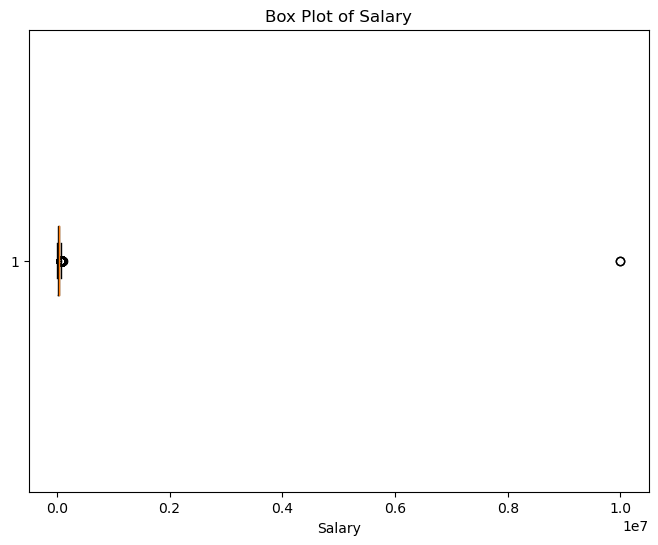

In [22]:
import matplotlib.pyplot as plt
# Create a box plot for the 'Salary' column
plt.figure(figsize=(8, 6))
plt.boxplot(final_df['Salary'], vert=False)
plt.title('Box Plot of Salary')
plt.xlabel('Salary')
plt.show()

In [23]:
# Replace '-', 'N/A', and blanks with 'non specified' in ContractType column
final_df['ContractType'].replace(['-', 'N/A', '', ' '], 'non specified', inplace=True)
final_df['ContractTime'].replace(['-', 'N/A', '', ' '], 'non specified', inplace=True)

In [24]:
# Convert 'PositionID' to integer type
final_df['PositionID'] = final_df['PositionID'].astype(int)
final_df['Salary'] = final_df['Salary'].astype(int)

# Convert 'CloseDate' to datetime data type
final_df['CloseDate'] = pd.to_datetime(final_df['CloseDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
final_df['OpenDate'] = pd.to_datetime(final_df['OpenDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [25]:
print(final_df.head())
print(final_df.info())

   PositionID                                              Title    Location  \
0    69568721          Manufacturing Engineer Injection Moulding   Hampshire   
1    71351976                    Civil Design Engineer London UK      London   
2    68303946  Project ManagerTeam LeadTechnology ChangeFinan...      London   
3    72654312                      2nd  3rd Line Support Windows  Birmingham   
4    71799126                      Marketing Executive ecommerce   Berkshire   

                     Company  Salary ContractType ContractTime  \
0          Austin Fraser Ltd   37500    full_time    permanent   
1             Selby Jennings   32500    full_time    permanent   
2         Cornwallis Elt Ltd   67500    full_time    permanent   
3                Harvey Nash   30000    full_time    permanent   
4  ECS Recruitment Group Ltd   32500    full_time    permanent   

                    Category            OpenDate           CloseDate  \
0           Engineering Jobs 2013-06-26 00:00:00 2

In [26]:
final_df.isna().sum()

PositionID      0
Title           0
Location        0
Company         0
Salary          0
ContractType    0
ContractTime    0
Category        0
OpenDate        0
CloseDate       0
SrcName         0
dtype: int64

In [27]:
final_df

PositionID                                              Title  \
0        69568721          Manufacturing Engineer Injection Moulding   
1        71351976                    Civil Design Engineer London UK   
2        68303946  Project ManagerTeam LeadTechnology ChangeFinan...   
3        72654312                      2nd  3rd Line Support Windows   
4        71799126                      Marketing Executive ecommerce   
...           ...                                                ...   
50748    70013442                                 CHEF WEEKENDS ONLY   
50749    72608499      Service ReadinessService Introduction Manager   
50750    69181134                     Office Technical Administrator   
50751    68310864  Customer Services Advisors  PTFT Full Training...   
50752    70139229          Health  Social Care TutorAssessor Bristol   

               Location                    Company  Salary   ContractType  \
0             Hampshire          Austin Fraser Ltd   37500      full_time   
1                London             Selby Jennings   32500      full_time   
2                London         Cornwallis Elt Ltd   67500      full_time   
3            Birmingham                Harvey Nash   30000      full_time   
4             Berkshire  ECS Recruitment Group Ltd   32500      full_time   
...                 ...                        ...     ...            ...   
50748            Surrey         CHD Living Limited   16800      part_time   
50749            London       Spargonet Consulting   55000      full_time   
50750          Cheshire                Group Cytek   21500      full_time   
50751  Northamptonshire    Consumer Champion Group   17000      full_time   
50752                UK       Pursuit Training Ltd   18000  non specified   

      ContractTime                     Category            OpenDate  \
0        permanent             Engineering Jobs 2013-06-26 00:00:00   
1        permanent             Engineering Jobs 2012-12-24 15:00:00   
2        permanent    Accounting & Finance Jobs 2012-03-10 00:00:00   
3        permanent                      IT Jobs 2013-12-07 00:00:00   
4        permanent                   Sales Jobs 2013-12-07 12:00:00   
...            ...                          ...                 ...   
50748    permanent  Hospitality & Catering Jobs 2013-11-07 00:00:00   
50749    permanent                      IT Jobs 2012-02-25 12:00:00   
50750    permanent             Engineering Jobs 2012-02-05 00:00:00   
50751     contract    Accounting & Finance Jobs 2012-04-29 00:00:00   
50752    permanent                Teaching Jobs 2012-08-11 00:00:00   

                CloseDate                   SrcName  
0     2013-09-24 00:00:00  energygenerationjobs.com  
1     2013-01-23 15:00:00  energygenerationjobs.com  
2     2012-06-08 00:00:00  energygenerationjobs.com  
3     2014-03-07 00:00:00  energygenerationjobs.com  
4     2014-02-05 12:00:00  energygenerationjobs.com  
...                   ...                       ...  
50748 2014-01-06 00:00:00             workthing.com  
50749 2012-04-25 12:00:00             workthing.com  
50750 2012-04-05 00:00:00             workthing.com  
50751 2012-07-28 00:00:00             workthing.com  
50752 2012-10-10 00:00:00            cvjobstore.com  

[50753 rows x 11 columns]

......

## Saving data


In [28]:
# code to save output data
# Save the cleaned DataFrame to a CSV file
final_df.to_csv('s4015465_dataset1_solution.csv', index=False)

## Summary

In conclusion, this code reads an XML dataset, extracts information about jobs, cleans and standardizes the data, displays the distribution of salaries, and saves the cleaned data to a CSV file. It makes sure the data is better organized and consistent, ready for additional analysis or use in data modeling projects.